## The Sparks Foundation internship program

### Task 4 - Supervised Machine Learning / Decision Tree


#### Import the Following Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Read data using pandas dataframe

In [2]:
my_data= pd.read_csv("Iris.csv")

In [3]:
my_data[0:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
my_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
my_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
print(my_data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [7]:
print(my_data.shape)

(150, 6)


In [8]:
my_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Data Visualisation

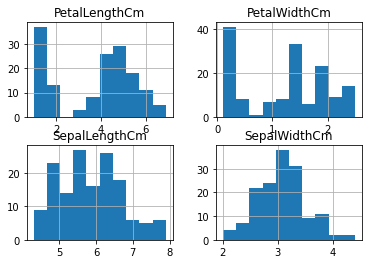

In [10]:
viz = my_data[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
viz.hist()
plt.show()

In [11]:
my_data["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

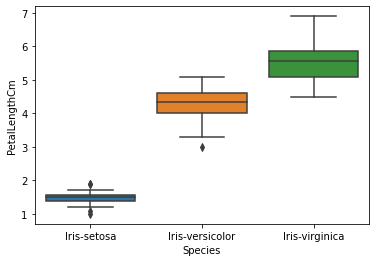

In [12]:
sns.boxplot(x="Species", y="PetalLengthCm", data=my_data)
plt.show()

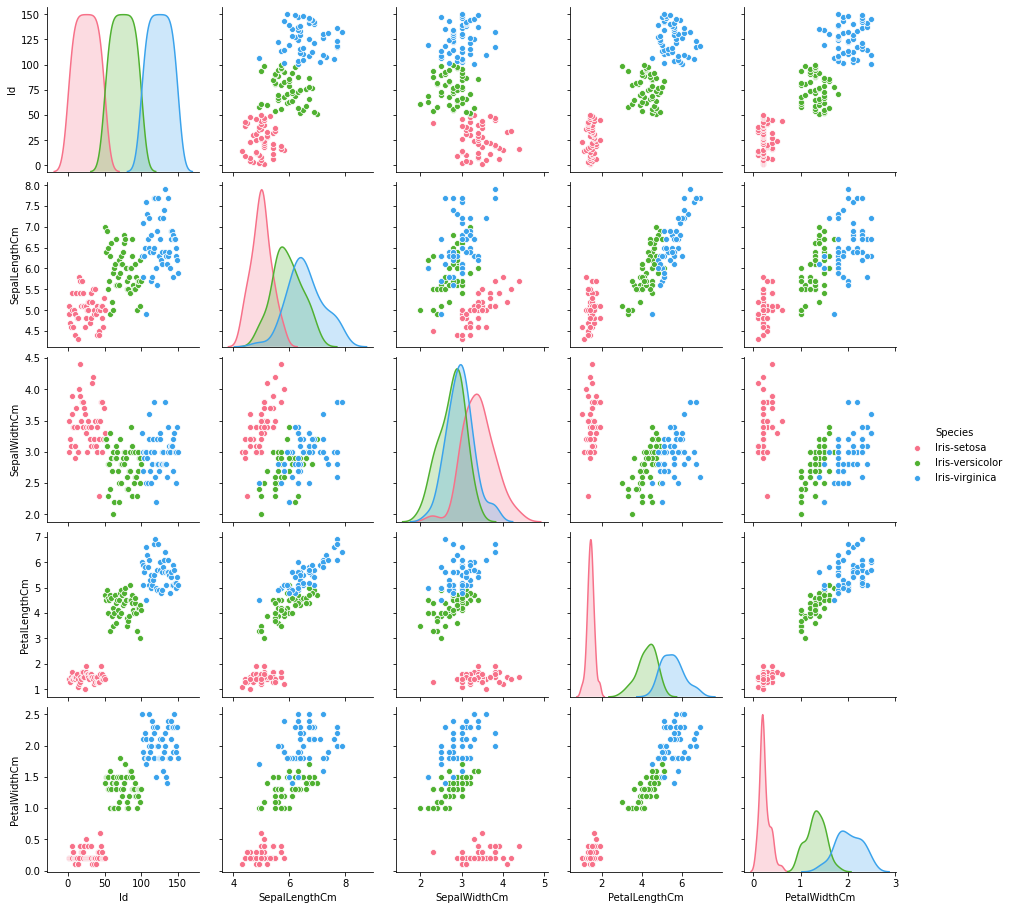

In [13]:
g = sns.pairplot(my_data, hue="Species", palette="husl")

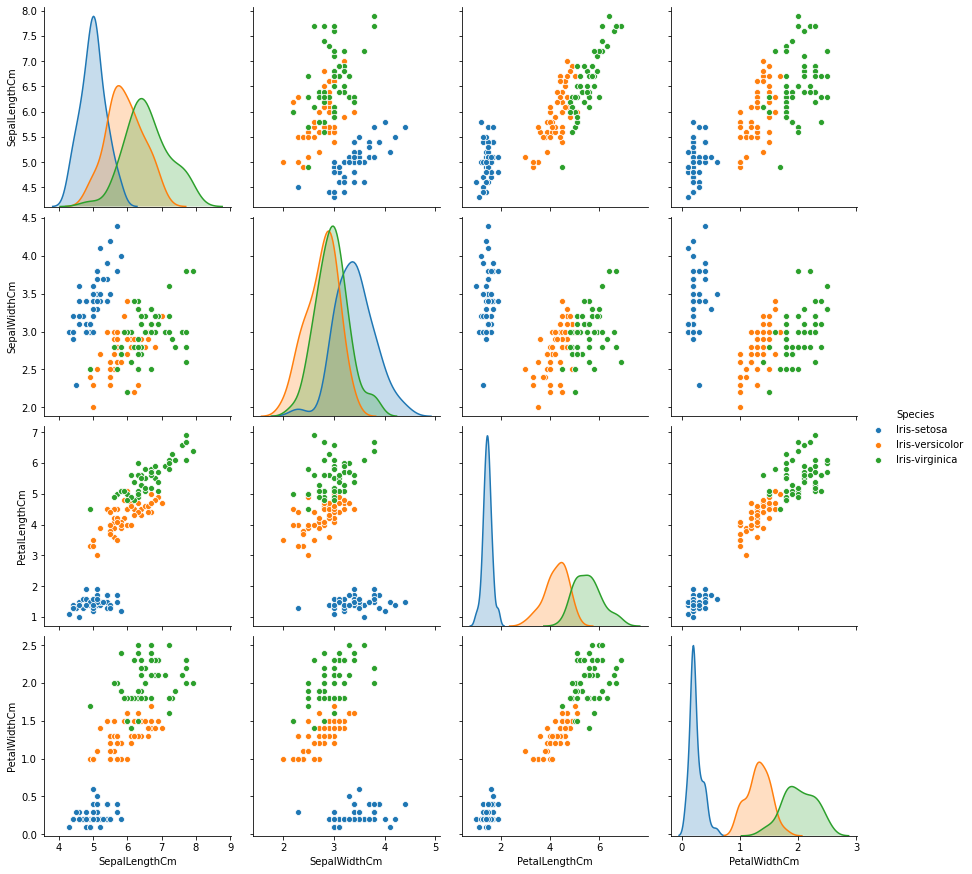

In [14]:
sns.pairplot(my_data.drop("Id", axis=1), hue="Species", height=3, diag_kind="auto")
plt.show()

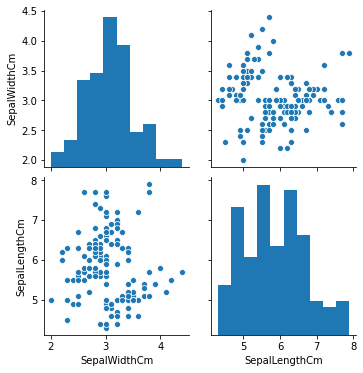

In [15]:
g = sns.pairplot(my_data, vars=["SepalWidthCm", "SepalLengthCm"])

### Pre-processing

In [16]:
X = my_data.iloc[:, 1:5].values
Y = my_data.iloc[:, 5].values

### Setting up the Decision Tree

#### We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

In [17]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size = 0.25, random_state =0)

### Modeling
#### We will first create an instance of the DecisionTreeClassifier called irisTree. Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [18]:
irisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
irisTree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
irisTree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction
#### Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [20]:
predTree = irisTree.predict(X_testset)

In [21]:
print (predTree [0:5])
print (Y_testset [0:5])

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']


### Evaluation
#### Next, let's import metrics from sklearn and check the accuracy of our model.

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.9736842105263158


In [23]:
(predTree==Y_testset).sum()/predTree.shape[0]

0.9736842105263158

### Visualization
#### Lets visualize the tree

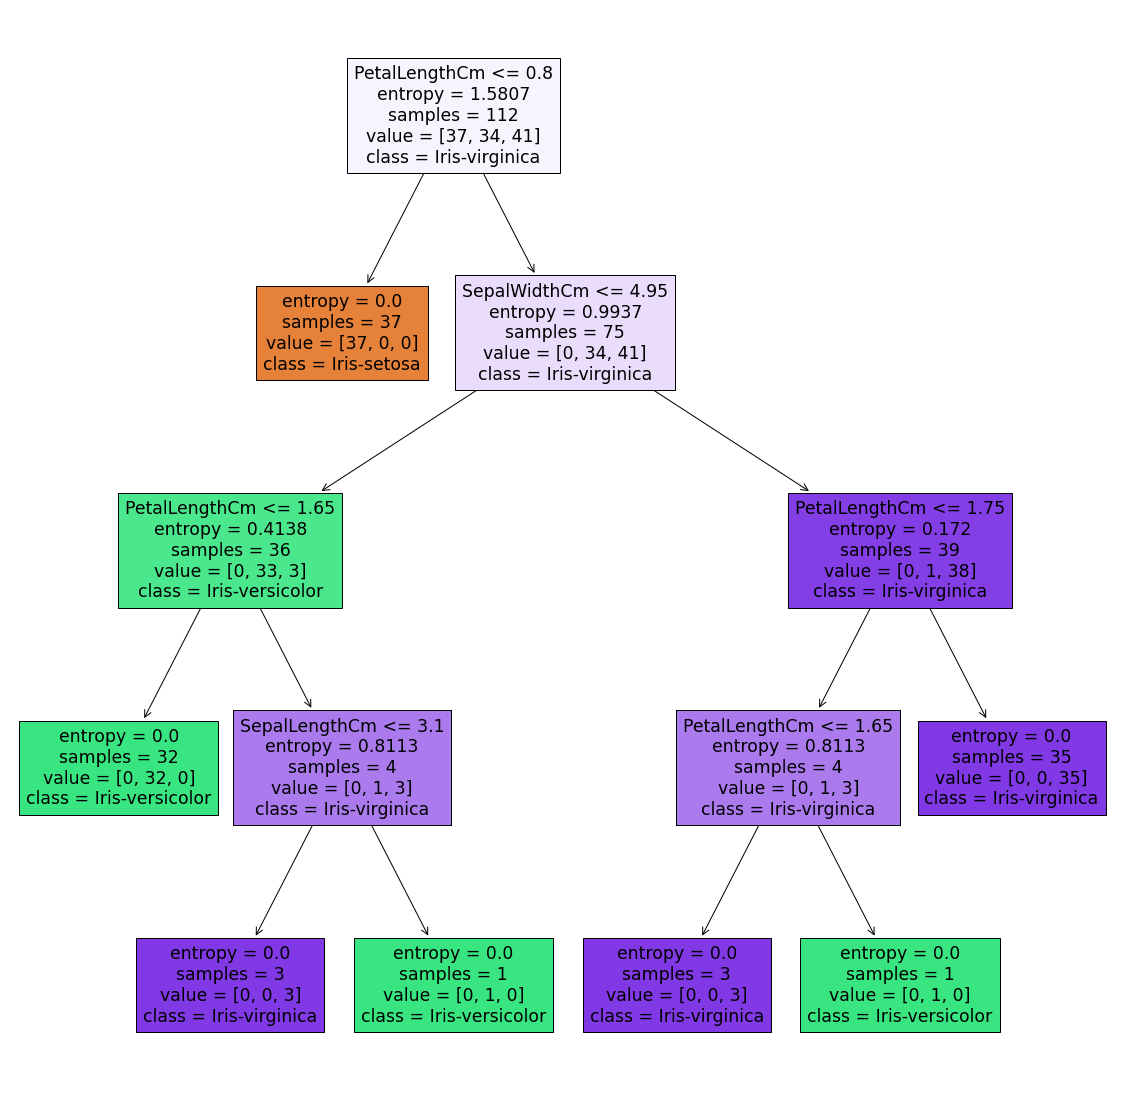

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree_img= plot_tree(irisTree, feature_names=my_data.columns, class_names=my_data['Species'].unique().tolist(), precision=4,label="all",filled=True)
plt.show()